In [81]:
import pandas as pd
import numpy as np
import pyecharts
from pyecharts import options as opts
import matplotlib.pyplot as plt
df_orinal = pd.read_csv('/Users/jz/GitHub/CapStone/Data/2019-12-3NYC_df_noloc.csv')

In [82]:
df = df_orinal.sort_values('min').reset_index(drop=True).drop_duplicates()
df

,rating,title,min,max,desc
0,4.9,Entry-Level SQL/BI Developer / Data Analyst (A...,14000,101000,Job Description\n\nBeaconFire Solution Inc. ba...
1,2.9,"Sr. Analyst/Assoc. Manager, HR Data and Analytics",25000,146000,"The Sr. Analyst/Assoc. Manager, HR Data and An..."
2,3.6,Data Analyst,27000,53000,"Martindale-Hubbell, a 140-year-plus firm, owns..."
3,2.9,Senior Data Analyst,29000,55000,"At Greater Than One, we proudly call ourselves..."
4,3.5,Data Analyst - Account Analytics,30000,63000,About Us\n\nMediaMath created the first softwa...
...,...,...,...,...,...
945,3.2,"Senior Manager I, Data Analyst",129000,182000,Position DescriptionConsults with internal org...
947,3.8,Insight Studio Specialist Data Scientist - Ana...,132000,185000,"While analytics isn't new, we're experiencing..."
948,3.8,Specialist Analyst Data Scientist - Technology...,132000,185000,"While analytics isn't new, we're experiencing..."
949,3.6,"Senior/Staff Data Scientist, Analyst",156000,209000,SoFi is looking for a Senior/Staff Data Scient...


In [83]:
skill_count = pd.read_csv('/Users/jz/Github/CapStone/Others/skills2.csv')

df['desc'] = df['desc'].fillna('pass')
skill_list = skill_count['skills'][:50]

# create tuple of skill
def skill_cell_func(cell):

    skill_cell = ()
    if cell =='pass':
        pass
    else:
        for skill in skill_list:
            if skill in cell:
                skill_cell = skill_cell + (skill,)
    return skill_cell

# create list of skill list
cell_list_list = []
for cell in df['desc']:
    cell_list = list(skill_cell_func(cell))
    cell_list_list.append(cell_list)

# export csv file of list of skill list and then concat with df in Excel
cell_series = pd.Series(cell_list_list)
df_update = pd.concat([df, cell_series], axis=1).drop(columns='desc')

In [84]:
df_update.columns = ['rating','title', 'min','max','skills']
df_update.head()

,rating,title,min,max,skills
0,4.9,Entry-Level SQL/BI Developer / Data Analyst (A...,14000.0,101000.0,"[SQL, R, Java, Microsoft SQL Server, Excel, So..."
1,2.9,"Sr. Analyst/Assoc. Manager, HR Data and Analytics",25000.0,146000.0,"[R, Tableau, SAS, Microsoft Office, Excel]"
2,3.6,Data Analyst,27000.0,53000.0,"[SQL, R, Excel, Project Management]"
3,2.9,Senior Data Analyst,29000.0,55000.0,"[R, Tableau, Excel]"
4,3.5,Data Analyst - Account Analytics,30000.0,63000.0,"[Python, SQL, R, Hadoop, Spark, Hive, AWS, Pig..."


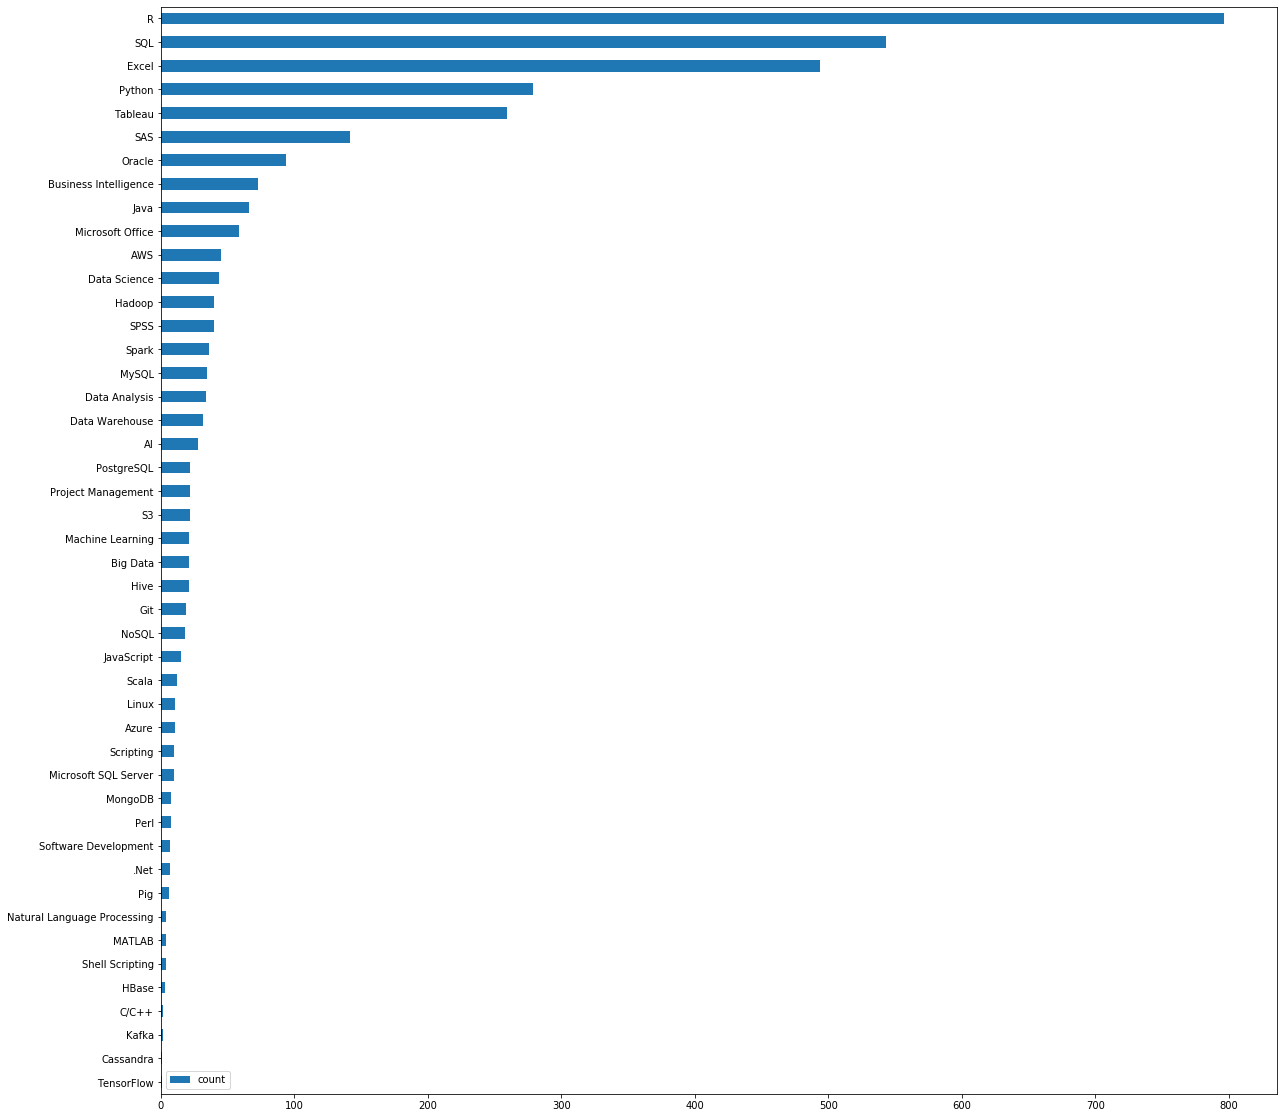

In [181]:
df_noskill = df_update.drop(['skills'], axis=1)
df_skill = pd.get_dummies(df_update['skills'].apply(pd.Series).stack()).sum(level=0)
df_skill_rank = df_skill.sum().to_frame(name='count').sort_values(by=['count'], ascending=False)
df_skill_rank.sort_values(by=['count'], ascending=True).plot.barh(figsize=(20,20))

In [182]:
df_update_all_num = pd.concat([df_update, df_skill], axis=1)
df_update_all_num = df_update_all_num.drop(columns=['skills']).reset_index(drop=True).dropna(0)
df_update_all_num

,rating,title,min,max,.Net,AI,AWS,Azure,Big Data,Business Intelligence,...,SAS,SPSS,SQL,Scala,Scripting,Shell Scripting,Software Development,Spark,Tableau,TensorFlow
0,4.9,Entry-Level SQL/BI Developer / Data Analyst (A...,14000.0,101000.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.9,"Sr. Analyst/Assoc. Manager, HR Data and Analytics",25000.0,146000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.6,Data Analyst,27000.0,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.9,Senior Data Analyst,29000.0,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.5,Data Analyst - Account Analytics,30000.0,63000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3.1,"Analyst, Data Architecture",73000.0,107000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,4.1,Data Analyst,73000.0,115000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,3.8,Data Analyst – University Graduate,73000.0,122000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,3.5,"Senior Data Analyst M/WBE, Enterprise Data Ser...",73000.0,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_update_all_num['rating'], y=df_update_all_num['min'][1:],
                    mode='markers',
                    name='min'))
fig.add_trace(go.Scatter(x=df_update_all_num['rating'], y=df_update_all_num['max'][1:],
                    mode='markers',
                    name='max'))
fig.show()

In [184]:
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

def max_n_estimators(mm,start_n_estimators,max_n_estimators, step):
    RMSE_list = []
    n_estimators_list = []

    X = df_update_all_num[feature_names].values
    y = df_update_all_num[mm].values

    data_dmatrix=xgb.DMatrix(data=X, label=y)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


    for n_estimators in np.arange(start_n_estimators,max_n_estimators, step):
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators = n_estimators)

        xgb_model.fit(X_train, y_train)

        y_pred = xgb_model.predict(X)

        mse=mean_squared_error(y, y_pred)
        n_estimators_list.append(n_estimators)
        RMSE_list.append(np.sqrt(mse))
    df = pd.DataFrame({'n_estimators_list' : n_estimators_list,
                           'RMSE_list' : RMSE_list},
                          columns=['n_estimators_list','RMSE_list'])
    return df

In [185]:
feature_names = list(df_update_all_num.drop(columns=['min','max','title']).columns)

In [105]:
df_nestimators_min = max_n_estimators('min',100,5000,100)
df_nestimators_max = max_n_estimators('max',100,5000,100)

In [106]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_nestimators_min['n_estimators_list'][1:], y=df_nestimators_min['RMSE_list'][1:],
                    mode='markers',
                    name='min'))
fig.add_trace(go.Scatter(x=df_nestimators_max['n_estimators_list'][1:], y=df_nestimators_max['RMSE_list'][1:],
                    mode='markers',
                    name='max'))
fig.show()

In [187]:
X = df_update_all_num[feature_names]
y = df_update_all_num['max']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model_max = xgb.XGBRegressor(objective="reg:squarederror", random_state=123,n_estimators = 500)

xgb_model_max.fit(X_train, y_train)

y_pred_max = xgb_model_max.predict(X)

mse=mean_squared_error(y, y_pred_max)

print('RMSE:',np.sqrt(mse))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 12905.349848072232


In [216]:
feature_names

['rating',
 '.Net',
 'AI',
 'AWS',
 'Azure',
 'Big Data',
 'Business Intelligence',
 'C/C++',
 'Cassandra',
 'Data Analysis',
 'Data Science',
 'Data Warehouse',
 'Excel',
 'Git',
 'HBase',
 'Hadoop',
 'Hive',
 'Java',
 'JavaScript',
 'Kafka',
 'Linux',
 'MATLAB',
 'Machine Learning',
 'Microsoft Office',
 'Microsoft SQL Server',
 'MongoDB',
 'MySQL',
 'Natural Language Processing',
 'NoSQL',
 'Oracle',
 'Perl',
 'Pig',
 'PostgreSQL',
 'Project Management',
 'Python',
 'R',
 'S3',
 'SAS',
 'SPSS',
 'SQL',
 'Scala',
 'Scripting',
 'Shell Scripting',
 'Software Development',
 'Spark',
 'Tableau',
 'TensorFlow']

In [188]:
X = df_update_all_num[feature_names]
y = df_update_all_num['min']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model_min = xgb.XGBRegressor(objective="reg:squarederror", random_state=123,n_estimators = 500)

xgb_model_min.fit(X_train, y_train)

y_pred_min = xgb_model_min.predict(X)

mse=mean_squared_error(y, y_pred_min)

print('RMSE:',np.sqrt(mse))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 6971.780493724007


In [189]:
y_pred_com = pd.DataFrame(
    {'y_min': df_update_all_num['min'],
     'y_max': df_update_all_num['max'],
     'y_pred_min': y_pred_min,
     'y_pred_max': y_pred_max,
    })
y_pred_com

,y_min,y_max,y_pred_min,y_pred_max
0,14000.0,101000.0,14987.088867,100726.343750
1,25000.0,146000.0,35041.480469,112626.273438
2,27000.0,53000.0,34551.929688,67096.335938
3,29000.0,55000.0,42099.113281,81706.351562
4,30000.0,63000.0,32234.830078,65089.328125
...,...,...,...,...
833,73000.0,107000.0,50013.964844,87722.546875
834,73000.0,115000.0,58925.703125,91992.140625
835,73000.0,122000.0,58760.660156,95481.445312
836,73000.0,120000.0,54020.292969,92023.453125


In [190]:
y_pred_com.to_csv('prediction_com.csv')

In [191]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_pred_min'],
                    mode='markers',
                    name='y_pred_min'))

fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_min'],
                    mode='markers',
                    name='y_min'))

fig.show()

In [192]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_pred_max'],
                    mode='markers',
                    name='y_pred_max'))

fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_max'],
                    mode='markers',
                    name='y_max'))

fig.show()

In [193]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [194]:
feature_importance = pd.DataFrame(list(zip(feature_names, list(xgb_model_min.feature_importances_))))
feature_importance.columns=['skills','importance']
feature_importance=feature_importance.sort_values('importance',ascending=False).reset_index(drop=True)
feature_importance.to_csv('feature_importance.csv')

In [195]:
import pickle
pickle.dump(xgb_model_min, open('min_xgb.pickle', 'wb'))
pickle.dump(xgb_model_max, open('max_xgb.pickle', 'wb'))

In [196]:
min_xgb = pickle.load(open('min_xgb.pickle', "rb"))
max_xgb = pickle.load(open('max_xgb.pickle', "rb"))
import os
print(round(os.path.getsize('min_xgb.pickle')/1000000,1), 'MB')
print(round(os.path.getsize('max_xgb.pickle')/1000000,1), 'MB')

0.3 MB
0.3 MB


In [197]:
print('Predicted Salary Range($): ',int(min_xgb.predict(X[:1])),'~',int(max_xgb.predict(X[:1])))

Predicted Salary Range($):  14987 ~ 100726


In [165]:
def NYC_salary_with_skills(rating,inputs_list):
    sample_list = [0] * (len(X.columns))
    input_X = pd.DataFrame([sample_list],
                 columns =list(X.columns))

    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = rating
    salary = (int(min_xgb.predict(input_X[:1])),int(max_xgb.predict(input_X[:1])))
    return salary

In [166]:
skill_money = {}
skill_money_list = []
for skill in list(X.columns)[1:]:
    skill_money['skill'] = skill
    skill_money['salary'] = NYC_salary_with_skills(3.6,[skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill = pd.DataFrame(skill_money_list).sort_values('salary',ascending=False)
single_skill = single_skill.reset_index(drop=True)
single_skill

,skill,salary
0,Machine Learning,"(60289, 108996)"
1,Hadoop,"(60131, 85062)"
2,MATLAB,"(56742, 99230)"
3,Python,"(56282, 85507)"
4,Microsoft SQL Server,"(55440, 92118)"
5,Shell Scripting,"(54988, 96245)"
6,Software Development,"(54187, 91539)"
7,Hive,"(54143, 89119)"
8,Spark,"(53934, 91974)"
9,SAS,"(53791, 94629)"


In [167]:
salary_skills_list = ['Python','SQL','Tableau']

In [161]:
suggest_list = []
all_list = salary_skills_list

for skill in single_skill['skill'][:5]:
    if skill not in salary_skills_list:
        suggest_list.append(skill)

    suggest_list_salary = {}
    suggest_list_salary_list = []
    for skill in suggest_list:
        all_list = []
        all_list = salary_skills_list+ [skill]
        suggest_list_salary['skill'] = skill
        suggest_list_salary['salary'] = int(np.subtract(NYC_salary_with_skills(3.6,all_list), NYC_salary_with_skills(3.6,salary_skills_list)).mean())
        suggest_list_salary_list.append(suggest_list_salary)
        suggest_list_salary = {}
        
    suggest_skills = pd.DataFrame(suggest_list_salary_list).sort_values('salary',ascending=False)
suggest_skills = suggest_skills[suggest_skills['salary'] > 0 ]
suggest_skills.columns = ['skill', 'with such more salary']
suggest_skills

,skill,with such more salary
2,MATLAB,11965
3,Microsoft SQL Server,7604
0,Machine Learning,6131
1,Hadoop,369


In [200]:
print(sel_features)

['rating', '.Net', 'AI', 'AWS', 'Azure', 'Big Data', 'Business Intelligence', 'C/C++', 'Data Analysis', 'Data Science', 'Data Warehouse', 'Excel', 'Git', 'HBase', 'Hadoop', 'Hive', 'Java', 'JavaScript', 'Kafka', 'Linux', 'MATLAB', 'Machine Learning', 'Microsoft Office', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Natural Language Processing', 'NoSQL', 'Oracle', 'Perl', 'Pig', 'PostgreSQL', 'Project Management', 'Python', 'R', 'S3', 'SAS', 'SPSS', 'SQL', 'Scala', 'Scripting', 'Shell Scripting', 'Software Development', 'Spark', 'Tableau', 'TensorFlow']


In [201]:
print(feature_names)

['rating', '.Net', 'AI', 'AWS', 'Azure', 'Big Data', 'Business Intelligence', 'C/C++', 'Cassandra', 'Data Analysis', 'Data Science', 'Data Warehouse', 'Excel', 'Git', 'HBase', 'Hadoop', 'Hive', 'Java', 'JavaScript', 'Kafka', 'Linux', 'MATLAB', 'Machine Learning', 'Microsoft Office', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Natural Language Processing', 'NoSQL', 'Oracle', 'Perl', 'Pig', 'PostgreSQL', 'Project Management', 'Python', 'R', 'S3', 'SAS', 'SPSS', 'SQL', 'Scala', 'Scripting', 'Shell Scripting', 'Software Development', 'Spark', 'Tableau', 'TensorFlow']


In [162]:
sel_features = list(single_skill.skill)
sel_features.append('rating')

In [163]:
len(sel_features)

47

In [202]:
import pickle
import pandas as pd
import numpy as np
xgb_model_min_loaded = pickle.load(open('min_xgb.pickle', "rb"))
xgb_model_max_loaded = pickle.load(open('max_xgb.pickle', "rb"))


### Remember to move'rating' to the first postion!!!
sel_features = ['rating', '.Net', 'AI', 'AWS', 'Azure', 'Big Data', 'Business Intelligence', 'C/C++', 'Cassandra', 'Data Analysis', 'Data Science', 'Data Warehouse', 'Excel', 'Git', 'HBase', 'Hadoop', 'Hive', 'Java', 'JavaScript', 'Kafka', 'Linux', 'MATLAB', 'Machine Learning', 'Microsoft Office', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Natural Language Processing', 'NoSQL', 'Oracle', 'Perl', 'Pig', 'PostgreSQL', 'Project Management', 'Python', 'R', 'S3', 'SAS', 'SPSS', 'SQL', 'Scala', 'Scripting', 'Shell Scripting', 'Software Development', 'Spark', 'Tableau', 'TensorFlow']

def NYC_salary_with_skills(rating,inputs_list):
    sample_list = [0] * (len(X.columns))
    input_X = pd.DataFrame([sample_list],
                 columns =list(X.columns))

    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = rating
    salary = (int(xgb_model_min_loaded.predict(input_X)),int(xgb_model_max_loaded.predict(input_X)))
    return salary


def nyc_salary_with_skills(rating, inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                           columns=list(sel_features))

    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = (int(xgb_model_min_loaded.predict(input_X)), int(xgb_model_max_loaded.predict(input_X)))
    return salary

skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['salary'] = nyc_salary_with_skills(3.6, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill = pd.DataFrame(skill_money_list).sort_values('salary', ascending=False)

In [203]:
nyc_salary_with_skills(3.6,['Python','SQL','Tableau','R','Microsoft Office'])

(50357, 94115)

In [204]:
def nyc_salary_with_skills_and_then(rating, inputs_list):
    sample_list = [0] * (len(sel_features))
    input_x = pd.DataFrame([sample_list],
                           columns=list(sel_features))

    for inputs in inputs_list:
        if inputs in list(input_x.columns):
            input_x[inputs] = 1
    input_x['rating'] = float(rating)
    salary_min = int(xgb_model_min_loaded.predict(input_x))
    salary_max = int(xgb_model_max_loaded.predict(input_x))

    # suggest skill with more salary
    suggest_list = []
    all_list = inputs_list

    for skill in single_skill['skill'][:10]:
        if skill not in inputs_list:
            suggest_list.append(skill)

        suggest_list_salary = {}
        suggest_list_salary_list = []
        for skill in suggest_list:
            all_list = []
            all_list = inputs_list + [skill]
            suggest_list_salary['skill'] = skill
            suggest_list_salary['salary'] = int(np.subtract(nyc_salary_with_skills(rating, all_list),
                                                            nyc_salary_with_skills(rating, inputs_list)).mean())
            suggest_list_salary_list.append(suggest_list_salary)
            suggest_list_salary = {}
    suggest_skills = pd.DataFrame(suggest_list_salary_list).sort_values('salary', ascending=False)
    suggest_skills = suggest_skills[suggest_skills['salary'] > 0]
    suggest_skills.columns = ['Skill', 'Salary_Increase']
    return {'Min_Salary': salary_min, 'Max_Salary': salary_max, 'Suggest_Skills': suggest_skills}

In [207]:
nyc_salary_with_skills_and_then(3.5,['TensorFlow'])

{'Min_Salary': 53050,
 'Max_Salary': 93804,
 'Suggest_Skills':                   Skill  Salary_Increase
 0      Machine Learning            20964
 2                MATLAB            11525
 9                   SAS             9760
 5       Shell Scripting             9305
 1                Hadoop             8630
 4  Microsoft SQL Server             7604
 6  Software Development             6968
 8                 Spark             6779
 7                  Hive             5456
 3                Python             4509}

In [212]:
from itertools import combinations
L = list(X.columns)[1:]
unique_skill_pair = ()
for group_num in np.arange(1,3,1):
    unique_skill_pair += tuple([",".join(map(str, comb)) for comb in combinations(L, group_num)])

In [213]:
len(unique_skill_pair)

1081

In [214]:
nyc_salary_with_skills_and_then(2,['Python'])['Max_Salary']

94464

In [215]:
paired_skills = []
paired_skill_salary = []
for i in range(0,len(unique_skill_pair)):
    paired_skills.append( unique_skill_pair[i])
    paired_skill_salary.append(nyc_salary_with_skills_and_then(3.6,unique_skill_pair[i].split(","))['Max_Salary'])
df_paired_skills = pd.DataFrame({'Paired Skills': paired_skills, 'Salary': paired_skill_salary})
df_paired_skills.describe()

,Salary
count,1081.000000
mean,82412.069380
std,12875.416936
min,40591.000000
25%,74132.000000
50%,82206.000000
75%,91054.000000
max,124792.000000


In [219]:
df_paired_skills.sort_values('Salary', ascending=False).reset_index(drop=True).to_csv('df_paired_skills.csv')

In [221]:
df_paired_skills.sort_values('Salary', ascending=False)[:50]

,Paired Skills,Salary
66,".Net,Machine Learning",124792
756,"MATLAB,Machine Learning",123957
528,"Git,Machine Learning",121008
800,"Machine Learning,Shell Scripting",120367
795,"Machine Learning,SAS",119980
801,"Machine Learning,Software Development",118236
782,"Machine Learning,Microsoft SQL Server",116797
802,"Machine Learning,Spark",116612
787,"Machine Learning,Oracle",115217
621,"Hive,Machine Learning",115177


In [223]:
import pandas as pd
import numpy as np
import pyecharts
from pyecharts import options as opts
df_single_skill_rank = pd.read_csv('feature_importance.csv',index_col=0)
df_single_skill_rank

,skills,importance
0,R,0.053017
1,Java,0.049587
2,Python,0.042361
3,SPSS,0.042139
4,Excel,0.037315
5,Project Management,0.037112
6,SAS,0.035554
7,Hive,0.034948
8,SQL,0.034157
9,Hadoop,0.033566


In [228]:
def nyc_salary_with_skills_MAX(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = int(xgb_model_max_loaded.predict(input_X[:1]))
    return salary

def nyc_salary_with_skills_Min(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))))
    return salary

def nyc_salary_with_skills_AVG(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))+int(xgb_model_max_loaded.predict(input_X[:1])))/2)
    return salary

In [226]:
inputs_list = ['MySql','Tableau','Python']
rating = 3.6

In [229]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Max_salary'] = nyc_salary_with_skills_MAX(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_max = pd.DataFrame(skill_money_list).sort_values('Max_salary', ascending=False)
single_skill_max = single_skill_max.reset_index(drop=True)
single_skill_max.head()

skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Min_salary'] = nyc_salary_with_skills_Min(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_min = pd.DataFrame(skill_money_list).sort_values('Min_salary', ascending=False)
single_skill_min = single_skill_min.reset_index(drop=True)
single_skill_min.head()

skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Avg'] = nyc_salary_with_skills_AVG(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_avg = pd.DataFrame(skill_money_list).sort_values('Avg', ascending=False)
single_skill_avg = single_skill_avg.reset_index(drop=True)
single_skill_avg.head()

,skill,Avg
0,Machine Learning,84642.5
1,MATLAB,77986.0
2,Shell Scripting,75616.5
3,SAS,74210.0
4,Microsoft SQL Server,73779.0


In [243]:
result1 = pd.merge(single_skill_avg, single_skill_max, how='inner', on=['skill'])
result2 =  pd.merge(result1, single_skill_min, how='inner', on=['skill']) 
result2.columns=['skills','avg','max','min']

single_skill_info = result2.join(df_single_skill_rank.set_index('skills'), on='skills')
single_skill_info.columns=['name','avg','max','min','importance']
single_skill_info.to_csv('single_skill_info.csv')

In [244]:
single_skill_info

,name,avg,max,min,importance
0,Machine Learning,84642.5,108996,60289,0.019540
1,MATLAB,77986.0,99230,56742,0.006782
2,Shell Scripting,75616.5,96245,54988,0.028200
3,SAS,74210.0,94629,53791,0.035554
4,Microsoft SQL Server,73779.0,92118,55440,0.011303
5,.Net,73623.5,98431,48816,0.026995
6,Spark,72954.0,91974,53934,0.022963
7,Software Development,72863.0,91539,54187,0.032045
8,Hadoop,72596.5,85062,60131,0.033566
9,Oracle,72038.5,91269,52808,0.025169


([array([  1.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   8.,  12.,  23.,
          50.,  35.,  50., 115.,  68.,  73.,  52.,  62.,  41.,  39.,  21.,
          31.,  26.,  12.,  20.,  19.,   8.,   3.,   9.,   8.,   3.,   7.,
           5.,   2.,   3.,   2.,   4.,   2.,   4.,   1.,   2.,   0.,   1.,
           3.,   1.,   0.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.,  1.,  1., 11.,  4., 10., 11., 22., 16., 16., 44.,
         29., 28., 42., 45., 49., 44., 34., 41., 33., 34., 38., 37., 17.,
         10., 31., 18., 18., 16., 26.,  9.,  9.,  6.,  8.,  4., 11.,  5.,
          7.

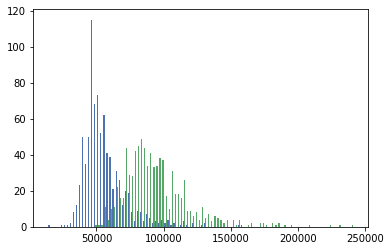

In [233]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

plt.hist([df['min'], df['max']], 100, label=['min', 'max'])

In [234]:
hist_min_y=[  1.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   8.,  12.,  23.,
          50.,  35.,  50., 115.,  68.,  73.,  52.,  62.,  41.,  39.,  21.,
          31.,  26.,  12.,  20.,  19.,   8.,   3.,   9.,   8.,   3.,   7.,
           5.,   2.,   3.,   2.,   4.,   2.,   4.,   1.,   2.,   0.,   1.,
           3.,   1.,   0.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.]

In [235]:
hist_max_y=[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.,  1.,  1., 11.,  4., 10., 11., 22., 16., 16., 44.,
         29., 28., 42., 45., 49., 44., 34., 41., 33., 34., 38., 37., 17.,
         10., 31., 18., 18., 16., 26.,  9.,  9.,  6.,  8.,  4., 11.,  5.,
          7.,  3.,  6.,  5.,  4.,  2.,  4.,  0.,  4.,  1.,  4.,  0.,  0.,
          1.,  2.,  0.,  0.,  2.,  2.,  1.,  0.,  2.,  1.,  2.,  0.,  1.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]

In [236]:
hist_x=[ 14000.,  16270.,  18540.,  20810.,  23080.,  25350.,  27620.,
         29890.,  32160.,  34430.,  36700.,  38970.,  41240.,  43510.,
         45780.,  48050.,  50320.,  52590.,  54860.,  57130.,  59400.,
         61670.,  63940.,  66210.,  68480.,  70750.,  73020.,  75290.,
         77560.,  79830.,  82100.,  84370.,  86640.,  88910.,  91180.,
         93450.,  95720.,  97990., 100260., 102530., 104800., 107070.,
        109340., 111610., 113880., 116150., 118420., 120690., 122960.,
        125230., 127500., 129770., 132040., 134310., 136580., 138850.,
        141120., 143390., 145660., 147930., 150200., 152470., 154740.,
        157010., 159280., 161550., 163820., 166090., 168360., 170630.,
        172900., 175170., 177440., 179710., 181980., 184250., 186520.,
        188790., 191060., 193330., 195600., 197870., 200140., 202410.,
        204680., 206950., 209220., 211490., 213760., 216030., 218300.,
        220570., 222840., 225110., 227380., 229650., 231920., 234190.,
        236460., 238730., 241000.]